In [1]:
# import required library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# read the data
df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,359783,7315304329,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,NaN,tx,32.856500,-96.599900,2021-05-01T10:15:37-0500,200
290125,358083,7316875320,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,NaN,black,tx,32.818710,-96.992283,2021-05-04T14:06:55-0500,8900
290126,152315,7313432323,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,NaN,wagon,NaN,ia,42.484503,-92.324974,2021-04-27T13:00:51-0500,7300
290127,117952,7316213204,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,full-size,SUV,red,ga,33.938100,-84.197200,2021-05-03T11:23:11-0400,4500


now we want to discover more information about the data

In [3]:
# shape of data
df.shape

(290129, 20)

In [4]:
# name of the columns 
df.columns

Index(['Unnamed: 0', 'id', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'price'],
      dtype='object')

In [5]:
# Checking total missing values
df.isnull().sum().to_frame()

,0
Unnamed: 0,0
id,0
year,0
manufacturer,11342
model,0
condition,116104
cylinders,119300
fuel,1453
odometer,0
title_status,5066


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

# -------------------------------------------------------------------

## Data Cleaning

# -------------------------------------------------------------------

as we saw in the previous two cells we have a many columns that contain a lots of non-value and that's will effect badlly in our model. so we decide to remove , edit this columns depends on how much null-value they contain

### 1. Drop colunms

here we want to drop some columns and the reason for that the following :

1. `id` and `Unnamed` : in this types of feature we don't need it at all because it's doesn't effect in our model

2. `lat` and `long` : this type of feature contain irrelative feature  .

3. `posting_date` : as we can see in the data all posting_date are in the same year and the month as well so its mean that its **constance** , the second reason this type of features its also irrelative feature .

4. `size` : as we can see in the number of null_value we can see that's more than 80% of the data is null so it'll effects badly to our model so we prefer to delete it.

5. `state` : the city that the car are in their doesn't matter because it doesn't effect in the price of the car


In [7]:
# drop the above feature
df.drop([ 'Unnamed: 0','id', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
0,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,sedan,black,7995
1,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,SUV,black,14999
2,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,sedan,NaN,5995
3,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,SUV,NaN,0
4,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,SUV,silver,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,200
290125,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,black,8900
290126,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,wagon,NaN,7300
290127,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,SUV,red,4500


#                                  *    *   *

### 2. Numerical Data

#    *    *   *

the numerical data here:
##### 1. year
##### 2. odometer
##### 3. price

In [8]:
df.describe()

,year,odometer,price
count,290129.000000,2.901290e+05,2.901290e+05
mean,2011.359082,9.764241e+04,5.193300e+04
std,9.149422,2.058970e+05,9.591680e+06
min,1900.000000,0.000000e+00,0.000000e+00
25%,2008.000000,3.800000e+04,5.991000e+03
50%,2014.000000,8.561500e+04,1.399000e+04
75%,2017.000000,1.334360e+05,2.650000e+04
max,2022.000000,1.000000e+07,3.736929e+09


here we want to create a function for plotting the box plot to get more insight about the outlier

In [9]:
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=df[name], color='lightblue')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')

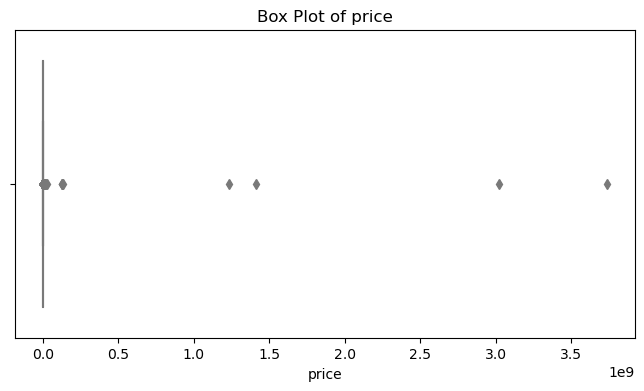

In [10]:
box_plot('price')

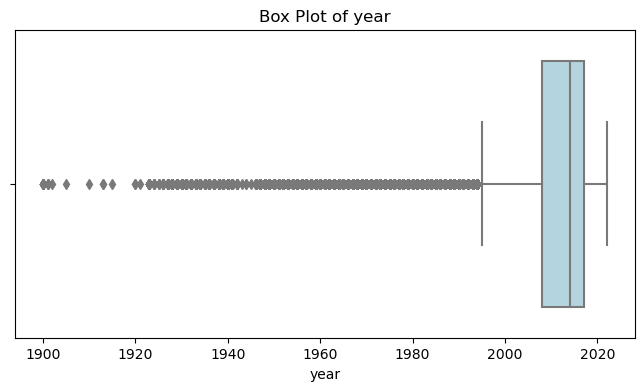

In [11]:
box_plot('year')

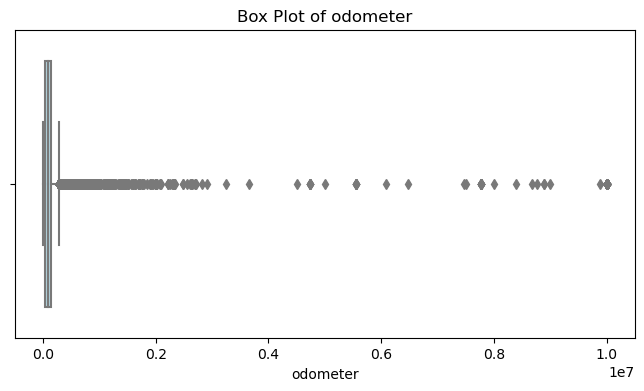

In [12]:
box_plot('odometer')

as we can see they are a lots of outliers in these columns,the Outliers reduces the accuracy of a model. We have to detect outliers and remove them.


now i want to apply the IQR if you want more information about this i recommend the following video that i take the solution from it
> https://www.youtube.com/watch?v=A3gClkblXK8

#### IQR implementation

In [13]:
def IQR(name):
    global new_df
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    print(f"Q1  {name}  {Q1}, Q3  {name}  {Q3}")
    print("---------------------------------------")
    iqr = Q3 - Q1
    print(f"IQR for {name} is equal to {iqr}")
    print("---------------------------------------")
    upper_limit = Q1 + 1.5 * iqr
    lower_limit = df[name].quantile(0.15)
    
    return (upper_limit,lower_limit)

#### `price`

In [14]:
upper_limit_price,lower_limit_price =IQR('price')

Q1  price  5991.0, Q3  price  26500.0
---------------------------------------
IQR for price is equal to 20509.0
---------------------------------------


In [15]:
df = df[(df['price'] < upper_limit_price) & (df['price'] > 0)]

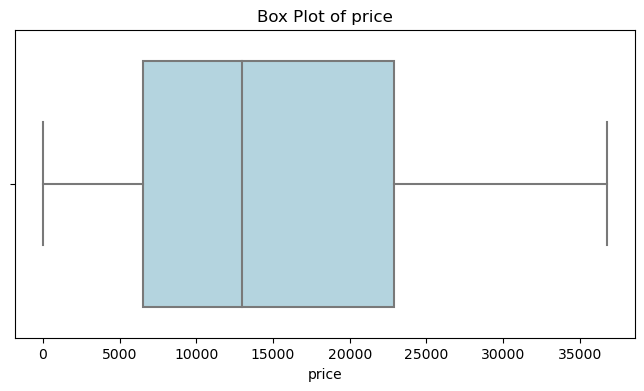

In [16]:
box_plot('price')

as you can see here we solve the outlier in the price column is a great Job :)
now we can say we end the first column

#### `Odometer`

In [17]:
upper_limit_odometer,lower_limit_odometer =IQR('odometer')

Q1  odometer  46000.0, Q3  odometer  140140.0
---------------------------------------
IQR for odometer is equal to 94140.0
---------------------------------------


In [18]:
df = df[(df['odometer'] < upper_limit_odometer) & (df['odometer'] > 0)]

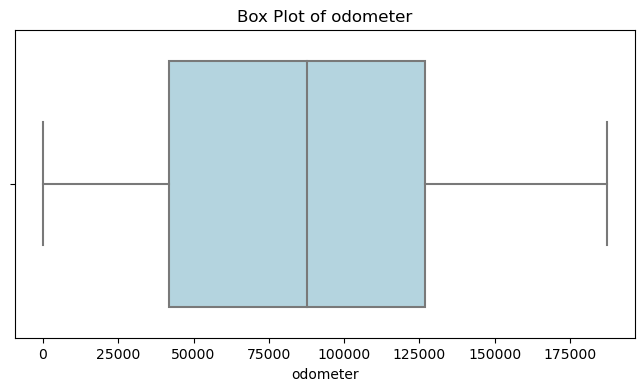

In [19]:
box_plot('odometer')

as you can see here we solve the outlier in the odometer column

#### `year`

In [20]:
# convert the odometer and year from float to integer
df['odometer'] = df['odometer'].astype(int)
df['year'] =  df['year'].astype(int)

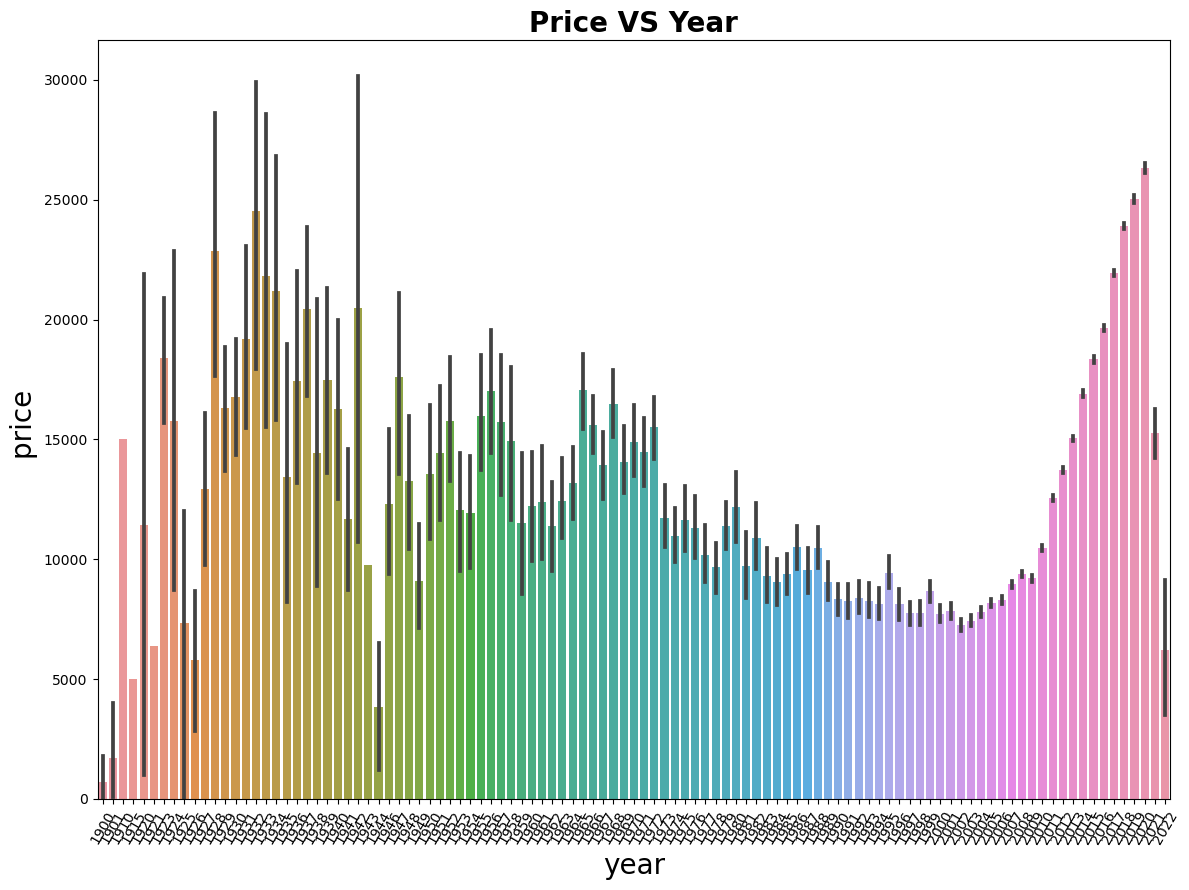

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y= df['price'],x= df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996

In [22]:
df = df[df['year'] > 1996]
df.shape

(206877, 13)

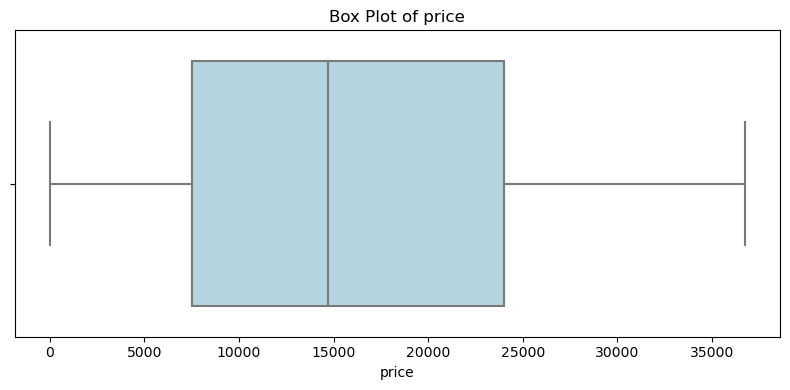

In [23]:
box_plot('price')

In [24]:
df['car_age'] = 2023 - df['year']
df.drop(['year'], axis = 1, inplace = True)

In [25]:
df['car_age'].isnull().sum()

0

now we will see the different before and after edit the outlier

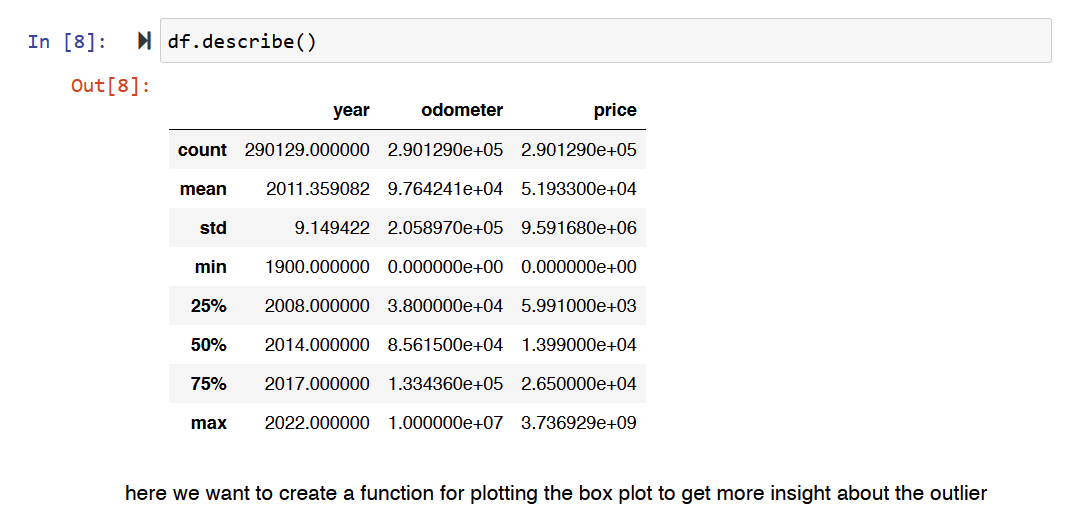

In [26]:
df.describe()

,odometer,price,car_age
count,206877.000000,206877.000000,206877.000000
mean,87205.845681,15924.160076,10.429709
std,50471.497029,9934.426033,5.030536
min,1.000000,1.000000,1.000000
25%,42162.000000,7500.000000,6.000000
50%,88002.000000,14709.000000,10.000000
75%,127903.000000,23990.000000,14.000000
max,187203.000000,36752.000000,26.000000
